In [96]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [97]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func ,inspect,Table, Column, ForeignKey


In [98]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector =inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [99]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [100]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [101]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [102]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [103]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# last date entry on table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

N = 365
date_365_days_ago = dt.datetime.strptime(last_date,'%Y-%m-%d')  - timedelta(days=N)


# Perform a query to retrieve the data and precipitation scores
last_year_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_365_days_ago).all()
display(last_year_results)

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [104]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(last_year_results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
clean_df =results_df.dropna()
grouped_df =clean_df.groupby("Date")
avg_grouped_df= grouped_df.mean()
sorted_df =avg_grouped_df.sort_index(ascending=True)


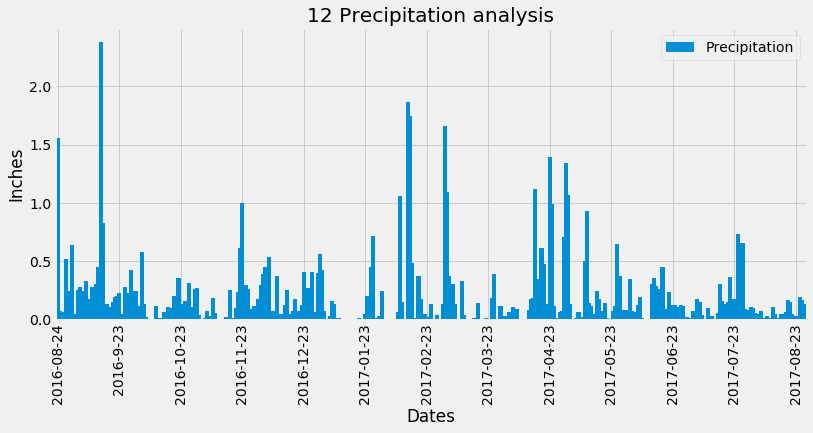

In [105]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = sorted_df.plot(kind='bar', width=2, figsize=(12,5))
plt.title("12 Precipitation analysis")
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.xticks(np.arange(0, 365, step=30), ['2016-08-24','2016-9-23','2016-10-23','2016-11-23'
                                        ,'2016-12-23','2017-01-23','2017-02-23','2017-03-23'
                                        ,'2017-04-23','2017-05-23','2017-06-23','2017-07-23'
                                        ,'2017-08-23'], rotation=90)

plt.show()

In [106]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()
    

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [107]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()


9

In [108]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_list = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
               order_by(func.count(Measurement.station).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [109]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
calc_results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()

result_dict= ({"MinTemp": (calc_results[0][0]), "MaxTemp": (calc_results[0][1]), "AvgTemp": (calc_results[0][2])})
result_dict

{'MinTemp': 54.0, 'MaxTemp': 71.66378066378067, 'AvgTemp': 85.0}

<function matplotlib.pyplot.show(*args, **kw)>

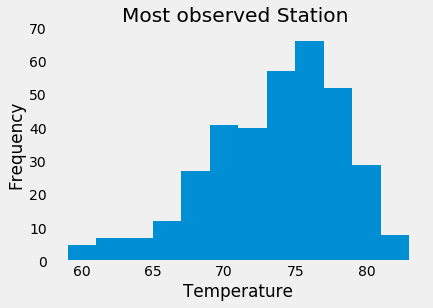

In [110]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_frequency_s = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= date_365_days_ago).all()

station_results_df = pd.DataFrame(highest_frequency_s, columns=['Station', 'tobs'])

station_results_df = station_results_df.set_index("Station")

plt.hist(station_results_df["tobs"], bins=12)
plt.ylim(0, 70)
plt.grid()
plt.title("Most observed Station ")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show


## Bonus Challenge Assignment

### Temperature Analysis I

In [111]:
import scipy.stats as stats
from sqlalchemy import extract  

June_results =session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
dec_results =session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
june = np.array(june_df)
dec =np.array(dec_results)

stats.ttest_ind(june, dec, equal_var=False)


Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))

###### REVIEW: Will you use a paired t-test, or an unpaired t-test? Paired t-test since we are reviewing same
##### subject just different times.

### Temperature Analysis II

In [114]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [115]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [116]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
